# **Tugas Besar 2**
## Kelompok 8:
1. 16520289&emsp;Gagas Praharsa Bahar
2. 16520299&emsp;Malik Akbar Hashemi Rafsanjani
3. 16520309&emsp;Alifia Rahmah
4. 16520319&emsp;Ng Kyle

## Sumber data: 
Trending YouTube Video Statistics (US Videos) - Mitchell J ([Kaggle](https://www.kaggle.com/datasnaek/youtube-new))

### Data utama : USvideos.csv (59.85 MB)
Sumber data dengan ukuran 40949 baris x 16 kolom

### Data penunjang : US_category_id.json (8.3 KB)
referensi category_id dengan category_name yang akan membantu pada pengolahan data selanjutnya.


## **Inisialisasi**

In [3]:
# import module yang dibutuhkan
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix

# link file csv dan json
url_csv = 'USvideos.csv'
url_json = 'US_category_id.json'

In [4]:
# Membaca file csv dan json
df = pd.read_csv(url_csv)
data = pd.read_json(url_json)

In [5]:
# Membuat list berisi tuple pasangan category_id dan category_name
lst = []
for i in range(len(data["items"])):
    lst.append((data["items"][i]["id"],data["items"][i]["snippet"]["title"]))

In [6]:
# Menambahkan kolom "category_name" dan mengisinya sesuai category_id
df.insert(len(df.columns),'category_name','')
for i in range(len(df)):
    for j in range(len(lst)):
        if int(df["category_id"][i]) == int(lst[j][0]):
            df["category_name"][i] = lst[j][1]

C:\Users\acer\AppData\Local\Temp/ipykernel_25100/308500564.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category_name"][i] = lst[j][1]


In [7]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


## **Karakteristik data**

In [8]:
#Ukuran Data
print("Banyak Baris :", len(df))
print("Banyak Kolom :", len(df.columns))

Banyak Baris : 40949
Banyak Kolom : 17


In [9]:
#Mencari data unik
for i in range (len(df.columns)):
  print("Data unik kolom", df.columns[i],"ada sebanyak", len(df.iloc[:,i].unique()))

Data unik kolom video_id ada sebanyak 6351
Data unik kolom trending_date ada sebanyak 205
Data unik kolom title ada sebanyak 6455
Data unik kolom channel_title ada sebanyak 2207
Data unik kolom category_id ada sebanyak 16
Data unik kolom publish_time ada sebanyak 6269
Data unik kolom tags ada sebanyak 6055
Data unik kolom views ada sebanyak 40478
Data unik kolom likes ada sebanyak 29850
Data unik kolom dislikes ada sebanyak 8516
Data unik kolom comment_count ada sebanyak 13773
Data unik kolom thumbnail_link ada sebanyak 6352
Data unik kolom comments_disabled ada sebanyak 2
Data unik kolom ratings_disabled ada sebanyak 2
Data unik kolom video_error_or_removed ada sebanyak 2
Data unik kolom description ada sebanyak 6902
Data unik kolom category_name ada sebanyak 16


In [10]:
#Mencari range atau member category tiap kolom time series dan numerikal
num_date = ["trending_date","publish_time","views","likes","dislikes"]
for i in num_date:
  print("Kolom", i, "memiliki range :", df[i].min(), "--",df[i].max())
print()

Kolom trending_date memiliki range : 17.01.12 -- 18.31.05
Kolom publish_time memiliki range : 2006-07-23T08:24:11.000Z -- 2018-06-14T01:31:53.000Z
Kolom views memiliki range : 549 -- 225211923
Kolom likes memiliki range : 0 -- 5613827
Kolom dislikes memiliki range : 0 -- 1674420



In [11]:
#Mencari nilai unik kategorikal
kategorikal = ["category_id", "category_name"]
for i in kategorikal:
  print("Member pada kolom", i, "adalah:")
  for j in df[i].unique():
    print(j)
  print()

Member pada kolom category_id adalah:
22
24
23
28
1
25
17
10
15
27
26
2
19
20
29
43

Member pada kolom category_name adalah:
People & Blogs
Entertainment
Comedy
Science & Technology
Film & Animation
News & Politics
Sports
Music
Pets & Animals
Education
Howto & Style
Autos & Vehicles
Travel & Events
Gaming
Nonprofits & Activism
Shows



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# **Data Preprocessing**

In [13]:
# delete kolom yang tidak diperlukan
df.drop('video_id', inplace=True, axis=1)       # tidak dibutuhkan
df.drop('thumbnail_link', inplace=True, axis=1) # tidak dibutuhkan
df.drop('description', inplace=True, axis=1)    # tidak dibutuhkan
df.drop('category_id', inplace=True, axis=1)    # digantikan category_name
df.drop('tags', inplace=True, axis=1)           # tidak dibutuhkan

In [14]:
# mengubah tipe data publish_time dan trending_date menjadi time series 
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df["trending_date"]=pd.to_datetime(df["trending_date"],format="%y.%d.%m")

In [15]:
df.head()

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,748374,57527,2966,15954,False,False,False,People & Blogs
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00,2418783,97185,6146,12703,False,False,False,Entertainment
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12 19:05:24,3191434,146033,5339,8181,False,False,False,Comedy
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13 11:00:04,343168,10172,666,2146,False,False,False,Entertainment
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12 18:01:41,2095731,132235,1989,17518,False,False,False,Entertainment


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           40949 non-null  datetime64[ns]
 1   title                   40949 non-null  object        
 2   channel_title           40949 non-null  object        
 3   publish_time            40949 non-null  datetime64[ns]
 4   views                   40949 non-null  int64         
 5   likes                   40949 non-null  int64         
 6   dislikes                40949 non-null  int64         
 7   comment_count           40949 non-null  int64         
 8   comments_disabled       40949 non-null  bool          
 9   ratings_disabled        40949 non-null  bool          
 10  video_error_or_removed  40949 non-null  bool          
 11  category_name           40949 non-null  object        
dtypes: bool(3), datetime64[ns](2), int64(4), objec

# **Data Analysis**

### Statistik umum setiap atribut data numerik

In [17]:
# informasi singkat data numerik
df.describe()

,views,likes,dislikes,comment_count
count,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [18]:
# Rata-rata
df.mean(numeric_only= True)

views                     2.360785e+06
likes                     7.426670e+04
dislikes                  3.711401e+03
comment_count             8.446804e+03
comments_disabled         1.545825e-02
ratings_disabled          4.127085e-03
video_error_or_removed    5.616743e-04
dtype: float64

In [19]:
# Standar deviasi
df.std()

C:\Users\acer\AppData\Local\Temp/ipykernel_25100/1003357973.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


trending_date              62 days 02:48:12.843623849
publish_time              161 days 16:12:31.642770688
views                                  7394113.759704
likes                                   228885.338209
dislikes                                 29029.705945
comment_count                            37430.486994
comments_disabled                            0.123368
ratings_disabled                              0.06411
video_error_or_removed                       0.023693
dtype: object

In [20]:
#Ekstremum minimum
df.min(numeric_only=True)

views                       549
likes                         0
dislikes                      0
comment_count                 0
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
dtype: object

In [21]:
#Ekstremum maksimum
df.max(numeric_only=True)

views                     225211923
likes                       5613827
dislikes                    1674420
comment_count               1361580
comments_disabled              True
ratings_disabled               True
video_error_or_removed         True
dtype: object

In [22]:
#persentil
persentil = [0.1,0.25,0.5,0.75,0.9]
for i in persentil:
  print("Persentil", i*100,"%")
  print(df.quantile(i))
  print()


Persentil 10.0 %


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

### Statistik data Channel

In [ ]:
# tabel frekuensi daftar 10 channel yang pernah masuk trending (paling sering)
df['channel_title'].value_counts()[:10]

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: channel_title, dtype: int64

### Statistik data Category

In [ ]:
# statistik yang dikelompokkan berdasarkan category_name
frekuensi_kategori = df.groupby("category_name").sum()
frekuensi_kategori

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_name,,,,,,,
Autos & Vehicles,520690717,4245656,243010,784447,5,10,0
Comedy,5117426208,216346746,7230391,22545582,2,0,0
Education,1180629990,49257772,1351972,5442242,8,5,0
Entertainment,20604388195,530516491,42987663,73566498,196,30,8
Film & Animation,7284156721,165997476,6075148,17887060,28,14,13
Gaming,2141218625,69038284,9184466,14740713,8,0,0
Howto & Style,4078545064,162880075,5473899,23149550,11,11,0
Music,40132892190,1416838584,51179008,125296396,9,24,0
News & Politics,1473765704,18151033,4180049,6039433,174,1,0


In [ ]:
# tabel frekuensi category-category yang pernah masuk trending 
# dan seberapa sering video dengan kategori tersebut masuk
df['category_name'].value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_name, dtype: int64

### Statistik data Views

In [ ]:
# banyak views terbanyak dan tersedikit
print("View terbanyak:", df["views"].max())
print("View tersedikit:", df["views"].min())

View terbanyak: 225211923
View tersedikit: 549


In [ ]:
# Video dengan banyak views terbesar
df.loc[df['views'] == df['views'].max()]

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
38547,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06 04:00:07,225211923,5023450,343541,517232,False,False,False,Music


In [ ]:
# Video dengan banyak views terkecil
df.loc[df['views'] == df['views'].min()]['title']

14335    1 dead, others injured after Ky. school shooting
Name: title, dtype: object

### Statistik data Likes

In [ ]:
# banyak likes terbanyak dan tersedikit
print("Like terbanyak:", df["likes"].max())
print("Like tersedikit:", df["likes"].min())

Like terbanyak: 5613827
Like tersedikit: 0


In [ ]:
# video dengan banyak likes terbesar
df.loc[df['likes'] == df['likes'].max()]

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
38273,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02,123010920,5613827,206892,1228655,False,False,False,Music


In [ ]:
# video dengan banyak likes terkecil
df.loc[df['likes'] == df['likes'].min()]

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
192,2017-11-14,Apple Clips sample,Steve Kovach,2017-11-09 18:01:04,2259,0,0,0,False,False,False,People & Blogs
1435,2017-11-21,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,2016-10-14 21:14:51,15058,0,0,0,True,True,False,Film & Animation
1490,2017-11-21,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,2017-10-28 11:15:14,2197,0,2,0,False,False,False,Sports
1667,2017-11-22,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,2016-10-14 21:14:51,34207,0,0,0,True,True,False,Film & Animation
1741,2017-11-22,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,2017-10-28 11:15:14,2447,0,3,1,False,False,False,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...
28135,2018-04-05,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,2018-03-21 18:42:04,1040664,0,0,0,True,True,False,People & Blogs
28346,2018-04-06,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,2018-03-21 18:42:04,1045731,0,0,0,True,True,False,People & Blogs
28550,2018-04-14,Coachella 2018 LIVE Channel 1,Coachella,2018-04-05 06:48:28,3598220,0,0,0,False,True,False,Music
28751,2018-04-15,Coachella 2018 LIVE Channel 1,Coachella,2018-04-05 06:48:28,11137071,0,0,2,False,True,False,Music


### Statistik data Dislikes

In [ ]:
# banyak dislike terbanyak dan tersedikit
print("Dislike terbanyak:", df["dislikes"].max())
print("Dislike tersedikit:", df["dislikes"].min())

Dislike terbanyak: 1674420
Dislike tersedikit: 0


In [ ]:
# video dengan dislike terbanyak
df.loc[df['dislikes'] == df['dislikes'].max()]

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
11323,2018-01-09,So Sorry.,Logan Paul Vlogs,2018-01-02 16:42:21,37539570,1402578,1674420,1361580,False,False,False,Entertainment


In [ ]:
# video dengan dislike tersedikit
df.loc[df['dislikes'] == df['dislikes'].min()]

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
147,2017-11-14,Improvising in the style of different classica...,Nahre Sol,2017-11-10 04:08:31,5149,242,0,54,False,False,False,Music
155,2017-11-14,"The Oak Beams of New College, Oxford",Stewart Brand,2012-06-10 19:24:38,6412,49,0,2,False,False,False,Education
160,2017-11-14,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,2017-03-31 21:46:53,773,2,0,0,False,False,False,Education
175,2017-11-14,Sphaera - demonstrating interaction,Jenny Hanell,2017-11-04 20:48:16,1827,3,0,2,False,False,False,Science & Technology
192,2017-11-14,Apple Clips sample,Steve Kovach,2017-11-09 18:01:04,2259,0,0,0,False,False,False,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...
28135,2018-04-05,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,2018-03-21 18:42:04,1040664,0,0,0,True,True,False,People & Blogs
28346,2018-04-06,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,2018-03-21 18:42:04,1045731,0,0,0,True,True,False,People & Blogs
28550,2018-04-14,Coachella 2018 LIVE Channel 1,Coachella,2018-04-05 06:48:28,3598220,0,0,0,False,True,False,Music
28751,2018-04-15,Coachella 2018 LIVE Channel 1,Coachella,2018-04-05 06:48:28,11137071,0,0,2,False,True,False,Music


### Statistik data Comment counts

In [ ]:
# banyak komentar terbanyak dan tersedikit
print("Comment counts terbanyak:", df["comment_count"].max())
print("Comment counts tersedikit:", df["comment_count"].min())

Comment counts terbanyak: 1361580
Comment counts tersedikit: 0


In [ ]:
# video dengan komentar terbanyak
df.loc[df['comment_count'] == df['comment_count'].max()]

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
11323,2018-01-09,So Sorry.,Logan Paul Vlogs,2018-01-02 16:42:21,37539570,1402578,1674420,1361580,False,False,False,Entertainment


In [ ]:
# video dengan komentar tersedikit
df.loc[df['comment_count'] == df['comment_count'].min()]

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
31,2017-11-14,Amazon Christmas Advert 2017 - Toys & Games,Amazon.co.uk,2017-11-06 17:52:50,26000,119,69,0,True,False,False,Entertainment
103,2017-11-14,H&M Holiday 2017 starring Nicki Minaj – offici...,H&M,2017-11-09 08:01:40,264793,3283,853,0,True,False,False,Entertainment
160,2017-11-14,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,2017-03-31 21:46:53,773,2,0,0,False,False,False,Education
192,2017-11-14,Apple Clips sample,Steve Kovach,2017-11-09 18:01:04,2259,0,0,0,False,False,False,People & Blogs
284,2017-11-15,"Joel Embiid on win over Clippers, scuffle with...",NBA on ESPN,2017-11-14 15:20:12,5813,33,3,0,False,False,False,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...
40549,2018-06-13,Nintendo @ E3 2018: Day 1,Nintendo,2018-06-13 01:18:57,3238183,61841,3708,0,True,False,False,Gaming
40624,2018-06-13,iPhone X — Animoji: Taxi Driver — Apple,Apple,2018-06-04 04:00:00,8903674,79182,31697,0,True,False,False,Science & Technology
40631,2018-06-13,And the WINNER of Britain’s Got Talent 2018 is...,Britain's Got Talent,2018-06-03 21:11:48,4642895,53192,4312,0,True,False,False,Entertainment
40832,2018-06-14,iPhone X — Animoji: Taxi Driver — Apple,Apple,2018-06-04 04:00:00,8916546,79282,31716,0,True,False,False,Science & Technology


In [ ]:
# video dengan komentar tersedikit, meskipun comments_disabled false
df.loc[(df['comment_count'] == df['comment_count'].min()) & (df['comments_disabled'] == False)]

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
160,2017-11-14,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,2017-03-31 21:46:53,773,2,0,0,False,False,False,Education
192,2017-11-14,Apple Clips sample,Steve Kovach,2017-11-09 18:01:04,2259,0,0,0,False,False,False,People & Blogs
284,2017-11-15,"Joel Embiid on win over Clippers, scuffle with...",NBA on ESPN,2017-11-14 15:20:12,5813,33,3,0,False,False,False,Sports
318,2017-11-15,Bill Gates bought land in Arizona to build tec...,12 News,2017-11-11 01:03:01,85643,170,45,0,False,False,False,People & Blogs
555,2017-11-16,Bill Gates bought land in Arizona to build tec...,12 News,2017-11-11 01:03:01,92327,182,45,0,False,False,False,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2018-02-16,Host Patton Oswalt Opens the 2018 Writers Guil...,WGA West,2018-02-12 01:57:26,13350,140,7,0,False,False,False,Film & Animation
28550,2018-04-14,Coachella 2018 LIVE Channel 1,Coachella,2018-04-05 06:48:28,3598220,0,0,0,False,True,False,Music
31212,2018-04-27,Earth Day 2018 Google Doodle,googledoodles,2018-04-21 15:00:50,3930335,87892,1854,0,False,False,True,Film & Animation
31429,2018-04-28,Earth Day 2018 Google Doodle,googledoodles,2018-04-21 15:00:50,4175576,91606,1951,0,False,False,True,Film & Animation


## Statistik data Publish Time

In [ ]:
# pengelompokan data berdasar hari di-publish
df["publish_time"].apply(lambda x: x.strftime('%A')).value_counts().to_frame().reset_index()


,index,publish_time
0,Friday,7002
1,Thursday,6950
2,Tuesday,6786
3,Wednesday,6762
4,Monday,6177
5,Sunday,3679
6,Saturday,3593


## Statistik data Trending Date

In [ ]:
# pengelompokan data berdasar bulan trending
trending = df.groupby([(df.trending_date.dt.year),(df.trending_date.dt.month)]).sum()
trending

views      likes  dislikes  comment_count  \
trending_date trending_date                                                    
2017          11              4206798140  159032378   5412376       17620212   
              12              8237204070  297367071  23602890       38116869   
2018          1               6441668933  251882440  22243761       38205914   
              2               8046104893  217896307  10478352       25112552   
              3              11548564376  402809262  14429156       46366902   
              4              14590073499  442508556  16760897       45480068   
              5              29181106586  828146533  36880602       89934140   
              6              14420249655  441504651  22170121       45051507   

                             comments_disabled  ratings_disabled  \
trending_date trending_date                                        
2017          11                            62                18   
              12                           123                27   
2018          1                             69                33   
              2                            108                53   
              3                             81                29   
              4                             50                 9   
              5                            111                 0   
              6                             29                 0   

                             video_error_or_removed  
trending_date trending_date                          
2017          11                                  1  
              12                                  0  
2018          1                                   0  
              2                                   3  
              3                                   0  
              4                                   8  
              5                                  11  
              6                                   0

# **Visualisasi Data**

### 10 Youtube channel teratas yang paling sering muncul di Trending Videos

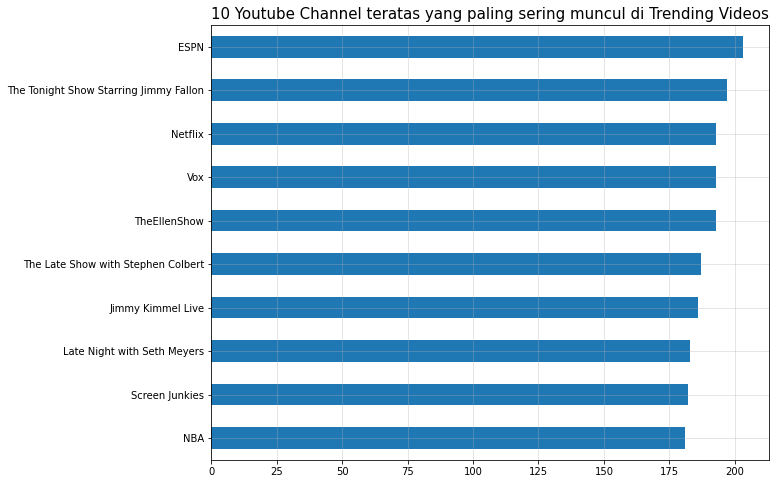

In [ ]:
# horizontal bar plot dari 10 youtube channel teratas yang paling sering muncul di trending 
df['channel_title'].value_counts().head(10).sort_values().plot(kind='barh', figsize=(10,8))
plt.title("10 Youtube Channel teratas yang paling sering muncul di Trending Videos", size=(15))
plt.grid(alpha=0.4)
plt.show()

Data diatas menunjukkan channel yang videonya paling banyak masuk Trending, dengan channel nomor 1 adalah ESPN.

Berdasarkan grafik diatas, channel yang paling sering masuk Trending biasanya adalah channel yang kontennya rutin dan banyak penggemar, seperti basket dan reality show.

### Jumlah video berdasarkan kategori

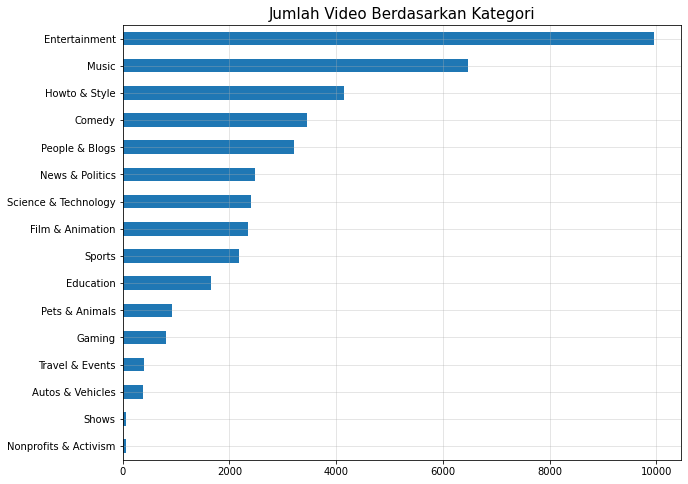

In [ ]:
# horizontal bar plot dari jumlah video berdasarkan kategori
df['category_name'].value_counts().sort_values().plot(kind='barh', figsize=(10,8))
plt.title("Jumlah Video Berdasarkan Kategori", size=15)
plt.grid(alpha=0.4)
plt.show()

Grafik diatas adalah grafik jumlah video berdasarkan kategori, dengan kategori dengan jumlah video terbanyak adalah Entertainment.

Insight yang didapatkan dari grafik ini adalah kategori entertainment paling sering masuk trending, yang disusul dengan Music. Ini artinya banyak pengguna YouTube yang menonton untuk mendapatkan konten hiburan/mendengar musik.

### Perbandingan Jumlah Views Setiap Kategori

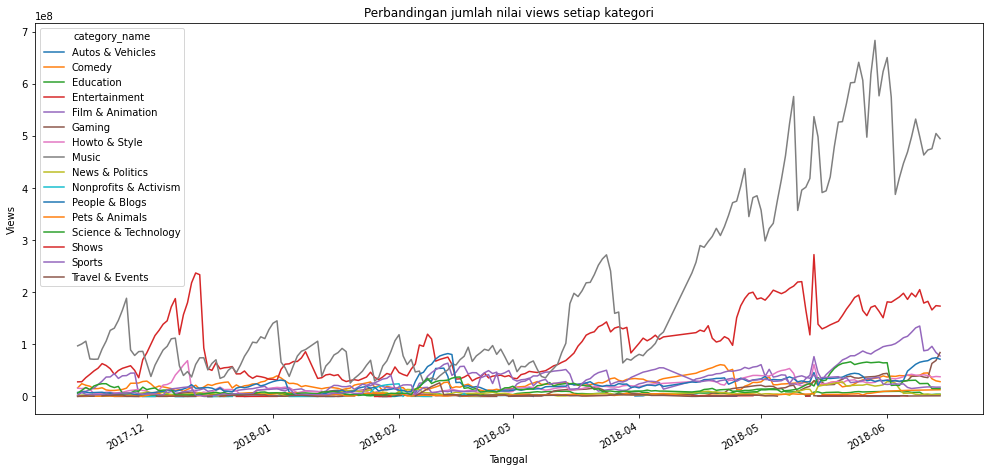

In [ ]:
# line plot perbandingan jumlah nilai views setiap kategori
df.groupby(["trending_date","category_name"])["views"].sum().unstack().plot(kind="line",figsize=(17,8),title="Perbandingan jumlah nilai views setiap kategori")
plt.xlabel("Tanggal")
plt.ylabel("Views")
plt.show()

Dari grafik diatas, diketahui bahwa kategori Music naik mendominasi Trending dimulai dari bulan April 2018. Sebelum April 2018, kategori Music dan Entertainment bersaing untuk mendapatkan views terbanyak pada video yang trending.

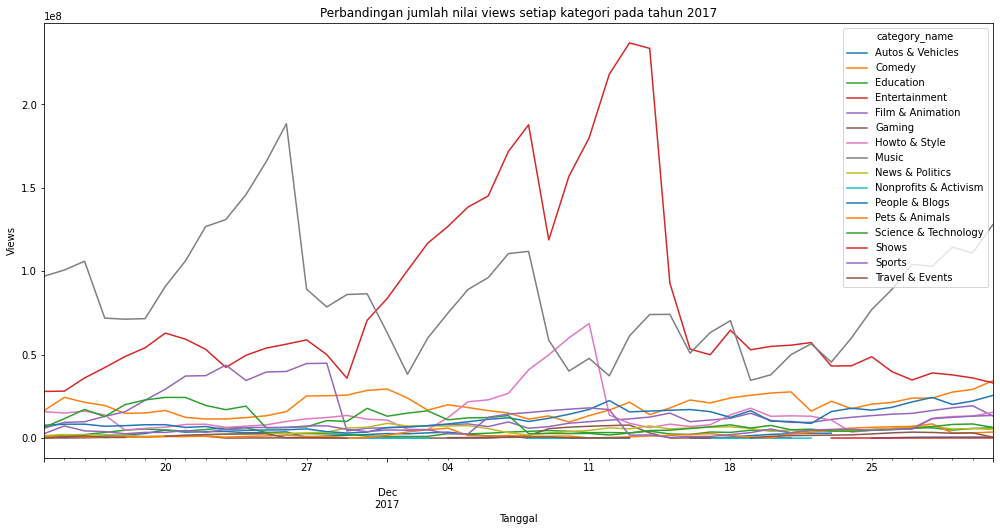

In [ ]:
# line plot perbandingan jumlah nilai views setiap kategori pada tahun 2017
df.loc[df["trending_date"].dt.year == 2017].groupby(["trending_date","category_name"])["views"].sum().unstack().plot(kind="line",figsize=(17,8),title="Perbandingan jumlah nilai views setiap kategori pada tahun 2017")
plt.xlabel("Tanggal")
plt.ylabel("Views")
plt.show()

Berbeda dengan keseluruhan data, pada tahun 2017 kategori Entertainment lebih mendominasi.

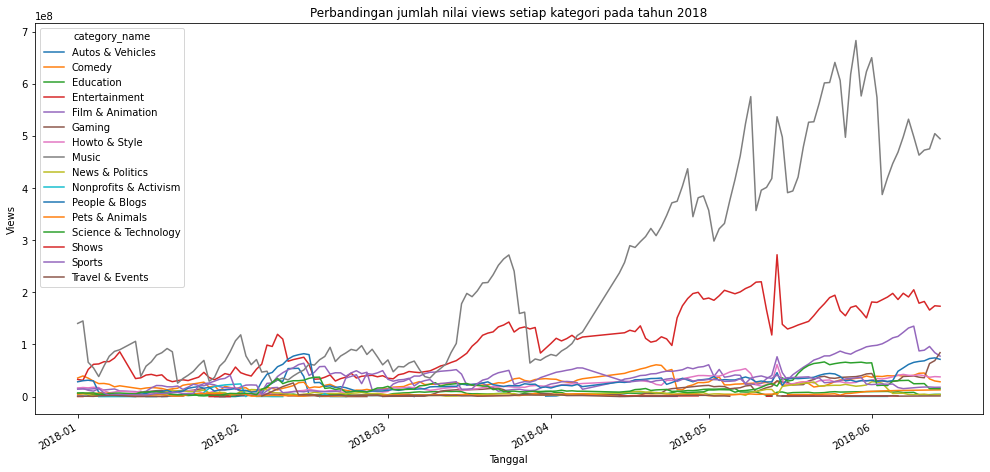

In [ ]:
# line plot perbandingan jumlah nilai views setiap kategori pada tahun 2018
df.loc[df["trending_date"].dt.year == 2018].groupby(["trending_date","category_name"])["views"].sum().unstack().plot(kind="line",figsize=(17,8),title="Perbandingan jumlah nilai views setiap kategori pada tahun 2018")
plt.xlabel("Tanggal")
plt.ylabel("Views")
plt.show()

### Perbandingan Jumlah Views Setiap Kategori

<AxesSubplot:title={'center':'Perbandingan data tiap bulan'}, xlabel='trending_date,trending_date'>

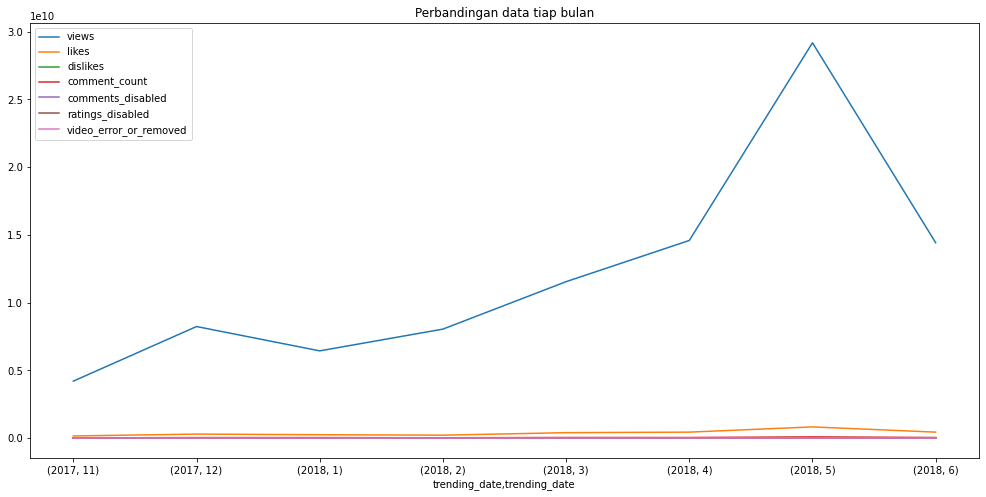

In [ ]:
# line plot perbandingan data tiap bulannya
trending.plot(kind="line", figsize = (17,8), title='Perbandingan data tiap bulan')

### Hubungan keseluruhan-bagian

<AxesSubplot:title={'center':'Perbandingan Jumlah Views Setiap Kategori'}, ylabel='views'>

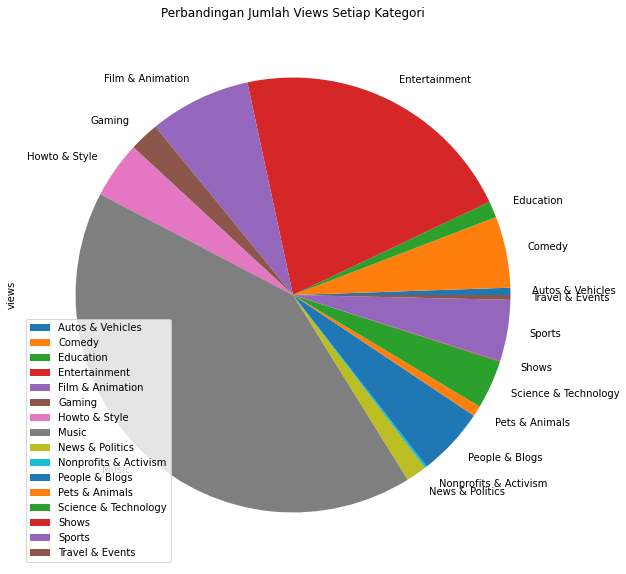

In [ ]:
# pie chart
plt.figure(figsize=(10,10))
df.groupby('category_name').sum()['views'].plot(kind='pie', title='Perbandingan Jumlah Views Setiap Kategori', legend=True)

<AxesSubplot:ylabel='category_name'>

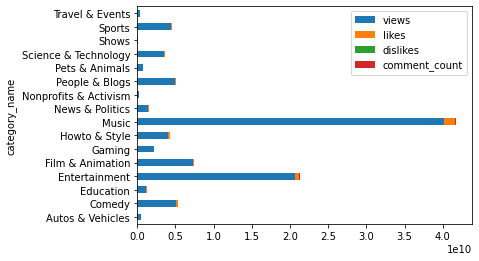

In [ ]:
# horizontal stacked bar chart Perbandingan Jumlah Views, Likes, dan Comments Setiap Kategori
df.groupby(['category_name']).sum().plot(kind='barh', y=['views', 'likes','dislikes', 'comment_count'], stacked=True)

<AxesSubplot:ylabel='trending_date,trending_date'>

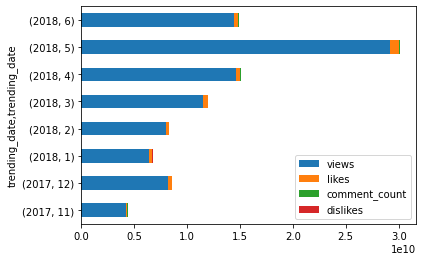

In [ ]:
trending.plot(kind = "barh", stacked = True, y = ["views", "likes", "comment_count","dislikes"])

<AxesSubplot:ylabel='trending_date,trending_date'>

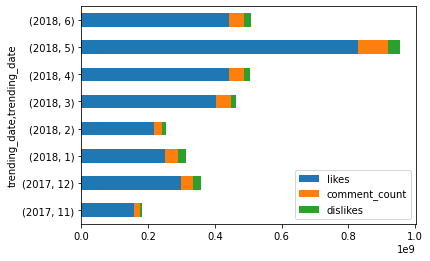

In [ ]:
trending.plot(kind = "barh", stacked = True, y = ["likes", "comment_count","dislikes"])

### Visualisasi korelasi views dan likes

Koefisien korelasi antara views dan likes adalah 0.8491765212088973


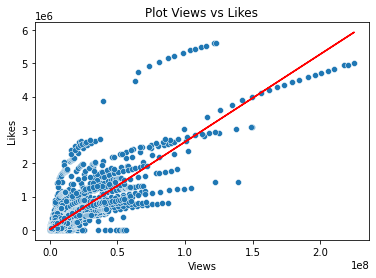

In [ ]:
x = df["views"].values.reshape(-1,1)
y = df["likes"].values.reshape(-1,1)

regresi = LinearRegression().fit(x,y)
hasil = regresi.predict(x)
sns.scatterplot(x=df["views"], y=df["likes"])
plt.plot(x,hasil, color="red")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("Plot Views vs Likes")
print("Koefisien korelasi antara views dan likes adalah " + str(df["views"].corr(df["likes"])))

Data diatas menunjukkan adanya korelasi positif antara views dan likes. Warna garis dibuat merah agar terlihat secara jelas garis regresi dari data.

Insight yang didapat adalah apabila views naik, maka likes juga akan cenderung naik.

C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'figsize'
  cset = contour_func(
C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


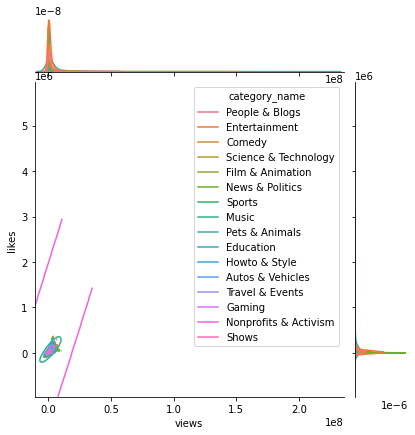

In [ ]:
sns.jointplot(data=df, x="views", y="likes",hue = "category_name", kind="kde", figsize = (18,8))

Dapat dilihat semua berkumpul pada satu daerah

### Korelasi antar kolom data

In [24]:
correlation_list = ['views', 'likes', 'dislikes', 'comment_count']
hm_data = df[correlation_list].corr() 
display(hm_data)

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


Tabel diatas merupakan tabel korelasi antar variabel kuantitatif. Korelasi terbesar ditunjukkan oleh like-view dengan nilai R 0.849.

Insight yang didapatkan dari tabel korelasi ini adalah apabila views tinggi, maka kecenderungan likes dan comment akan naik pula. Dan apabila likes atau dislikes tinggi, kecenderungan untuk mendapatkan comment naik juga. 

Yang dapat disimpulkan adalah, video trending biasanya viral dengan banyak likes yang berbanding lurus dengan views.

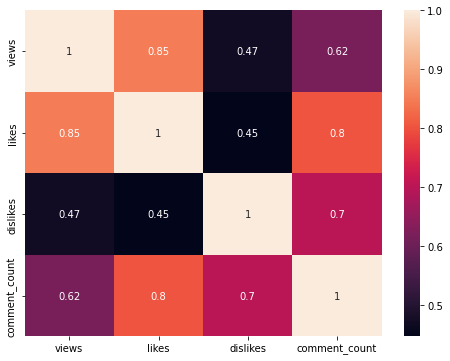

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(hm_data, annot=True);

Diatas adalah heatmap dari data korelasi yang telah dipaparkan diatas, agar lebih mudah dilihat dalam bentuk visual.

array([[<AxesSubplot:xlabel='views', ylabel='views'>,
        <AxesSubplot:xlabel='likes', ylabel='views'>,
        <AxesSubplot:xlabel='dislikes', ylabel='views'>,
        <AxesSubplot:xlabel='comment_count', ylabel='views'>],
       [<AxesSubplot:xlabel='views', ylabel='likes'>,
        <AxesSubplot:xlabel='likes', ylabel='likes'>,
        <AxesSubplot:xlabel='dislikes', ylabel='likes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='likes'>],
       [<AxesSubplot:xlabel='views', ylabel='dislikes'>,
        <AxesSubplot:xlabel='likes', ylabel='dislikes'>,
        <AxesSubplot:xlabel='dislikes', ylabel='dislikes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='dislikes'>],
       [<AxesSubplot:xlabel='views', ylabel='comment_count'>,
        <AxesSubplot:xlabel='likes', ylabel='comment_count'>,
        <AxesSubplot:xlabel='dislikes', ylabel='comment_count'>,
        <AxesSubplot:xlabel='comment_count', ylabel='comment_count'>]],
      dtype=object)

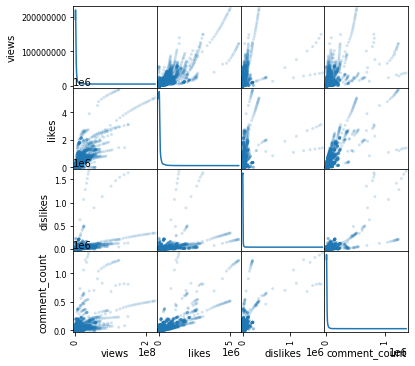

In [ ]:
scatter_matrix(df[correlation_list], alpha=0.2, figsize=(6, 6), diagonal='kde')